<a href="https://colab.research.google.com/github/maithstartup/langgraph_gemini/blob/main/Langgraph_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -U langgraph langchain_community langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
  Attempting uninstall

In [2]:
import os
import getpass

def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("GOOGLE_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

Please provide your GOOGLE_API_KEY··········
Please provide your TAVILY_API_KEY··········


# **Model**


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [4]:
gemini = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [5]:
gemini.invoke("what is the capital of india?")

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-3f71ed68-d528-40e5-b466-0f7ba4793966-0', usage_metadata={'input_tokens': 7, 'output_tokens': 10, 'total_tokens': 17, 'input_token_details': {'cache_read': 0}})

In [6]:
gemini.invoke("what is the Temperature today in delhi")

AIMessage(content='I do not have access to real-time information, including current weather conditions. To find out the temperature in Delhi today, I recommend checking a reliable weather app or website such as:\n\n*   **Google Weather:** Just search "weather in Delhi" on Google.\n*   **AccuWeather:** [https://www.accuweather.com/](https://www.accuweather.com/)\n*   **The Weather Channel:** [https://weather.com/](https://weather.com/)\n*   **India Meteorological Department (IMD):** [http://www.imd.gov.in/](http://www.imd.gov.in/) (Official source for India)\n\nThese sources will give you the most up-to-date temperature and weather forecast for Delhi.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-3cdfdcef-2d75-4084-9f69-38df1aff7291-0', usage_metadata={'input_tokens': 7, 'output_tokens': 165, 'total_tokens': 172, 'input_token_details': {'cache_read': 0}})

# **Tool**

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=4) #increased number of results
print(type(tool))
print(tool.name)

<class 'langchain_community.tools.tavily_search.tool.TavilySearchResults'>
tavily_search_results_json


In [8]:
tool.invoke("what is the weather in delhi?")

[{'title': 'Weather in delhi',
  'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'Delhi', 'region': 'Ontario', 'country': 'Canada', 'lat': 42.85, 'lon': -80.5, 'tz_id': 'America/Toronto', 'localtime_epoch': 1741399696, 'localtime': '2025-03-07 21:08'}, 'current': {'last_updated_epoch': 1741399200, 'last_updated': '2025-03-07 21:00', 'temp_c': -0.4, 'temp_f': 31.3, 'is_day': 0, 'condition': {'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}, 'wind_mph': 9.4, 'wind_kph': 15.1, 'wind_degree': 243, 'wind_dir': 'WSW', 'pressure_mb': 1007.0, 'pressure_in': 29.74, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 80, 'cloud': 0, 'feelslike_c': -4.9, 'feelslike_f': 23.1, 'windchill_c': -5.7, 'windchill_f': 21.7, 'heatindex_c': -0.9, 'heatindex_f': 30.5, 'dewpoint_c': -3.4, 'dewpoint_f': 25.8, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 0.0, 'gust_mph': 15.5, 'gust_kph': 24.9}}",
  'score': 0.9520846},
 {'title': 'Weather in Delhi in 

# **Orchestartion**

In [9]:
from langgraph.graph import StateGraph,START,END
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage


**State**

In [10]:
from typing import Annotated
from typing_extensions import TypedDict
import operator




In [11]:
class AgentState(TypedDict):
  messages:Annotated[list[AnyMessage],operator.add]

In [39]:
class Agent:

    def __init__(self, model, tools, system=""):
        self.system = system
        graph = StateGraph(AgentState)
        graph.add_node("llm", self.call_llm)
        graph.add_node("action", self.take_action)
        graph.add_conditional_edges(
            "llm",
            self.exists_action,
            {True: "action", False: END}
        )
        graph.add_edge("action", "llm")
        graph.set_entry_point("llm")
        self.graph = graph.compile()
        self.tools = {t.name: t for t in tools}
        self.model = model.bind_tools(tools)



    def exists_action(self, state: AgentState):
        result = state['messages'][-1]
        return len(result.tool_calls) > 0

    def call_llm(self, state: AgentState):
        messages = state['messages']
        if self.system:
            messages = [SystemMessage(content=self.system)] + messages
        message = self.model.invoke(messages)
        return {'messages': [message]}

    def take_action(self, state: AgentState):
        tool_calls = state['messages'][-1].tool_calls
        results = []
        for t in tool_calls:
            print(f"Calling: {t}")
            if not t['name'] in self.tools:      # check for bad tool name from LLM
                print("\n ....bad tool name....")
                result = "bad tool name, retry"  # instruct LLM to retry if bad
            else:
                result = self.tools[t['name']].invoke(t['args'])
            results.append(ToolMessage(tool_call_id=t['id'], name=t['name'], content=str(result)))
        print("Back to the model!")
        return {'messages': results}



In [40]:
prompt = """You are a smart research assistant. Use the search engine to look up information. \
You are allowed to make multiple calls (either together or in sequence). \
Only look up information when you are sure of what you want. \
If you need to look up some information before asking a follow up question, you are allowed to do that!
"""

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")  #reduce inference cost
abot = Agent(model, [tool], system=prompt)

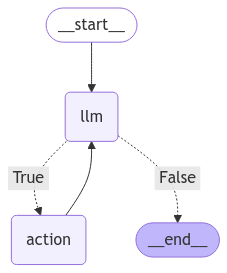

In [41]:
abot.graph

In [46]:
messages = [HumanMessage(content="What is the US currency exchange rate to INR today march 8th")]
result = abot.graph.invoke({"messages": messages})

Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'US dollar to INR exchange rate today march 8th 2024'}, 'id': 'd730c7ae-37b4-4af6-91bd-835a6191e542', 'type': 'tool_call'}
Back to the model!


In [47]:
result

{'messages': [HumanMessage(content='What is the US currency exchange rate to INR today march 8th', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "US dollar to INR exchange rate today march 8th 2024"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-baa1edd7-72be-4ba8-811f-d42a4fd286eb-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'US dollar to INR exchange rate today march 8th 2024'}, 'id': 'd730c7ae-37b4-4af6-91bd-835a6191e542', 'type': 'tool_call'}], usage_metadata={'input_tokens': 127, 'output_tokens': 25, 'total_tokens': 152, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='[{\'title\': \'US Dollar (USD) to Indian Rupee (INR) Exchange Rates for March 8 ...\', \'url\': \'https://www.exchange-rates.org/exchange-rate-history/usd-i

In [48]:
new_message = result['messages']+[HumanMessage(content="whats is greater 2500 INR or 27 USD")]
result = abot.graph.invoke({"messages": new_message})


Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'INR to USD'}, 'id': 'b2f36933-4ae7-42f1-9ef9-e9504b9a33be', 'type': 'tool_call'}
Back to the model!


In [49]:
result

{'messages': [HumanMessage(content='What is the US currency exchange rate to INR today march 8th', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "US dollar to INR exchange rate today march 8th 2024"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-baa1edd7-72be-4ba8-811f-d42a4fd286eb-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'US dollar to INR exchange rate today march 8th 2024'}, 'id': 'd730c7ae-37b4-4af6-91bd-835a6191e542', 'type': 'tool_call'}], usage_metadata={'input_tokens': 127, 'output_tokens': 25, 'total_tokens': 152, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='[{\'title\': \'US Dollar (USD) to Indian Rupee (INR) Exchange Rates for March 8 ...\', \'url\': \'https://www.exchange-rates.org/exchange-rate-history/usd-i

In [38]:
messages = [HumanMessage(content="What is the weather in SF and LA?")]
result = abot.graph.invoke({"messages": messages})

Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'weather in San Francisco'}, 'id': '840d5319-b175-48eb-81b9-eeb881c2ad41', 'type': 'tool_call'}
Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'fbe4bc20-eaf5-466a-9b23-870db5671037', 'type': 'tool_call'}
Back to the model!


In [ ]:
result['messages'][-1].content

'The weather in San Francisco is 41.5°F and sunny. The weather in Los Angeles is 46°F and sunny.'

In [ ]:
query = "Who won the super bowl in 2024? In what state is the winning team headquarters located? \
What is the GDP of that state? Answer each question."
messages = [HumanMessage(content=query)]

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")  # requires more advanced model
abot = Agent(model, [tool], system=prompt)
result = abot.graph.invoke({"messages": messages})

Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'who won super bowl 2024'}, 'id': 'e20cd803-b45a-40dc-a9cc-6ba8d11407ed', 'type': 'tool_call'}
Back to the model!
Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'Kansas City Chiefs headquarters location'}, 'id': '20763099-ced1-4a37-862f-89719539f367', 'type': 'tool_call'}
Back to the model!
Calling: {'name': 'tavily_search_results_json', 'args': {'query': 'GDP of Missouri'}, 'id': '196b48f5-8b57-4413-b14a-0386a0f22701', 'type': 'tool_call'}
Back to the model!


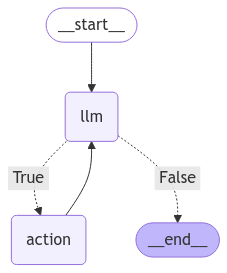

In [ ]:
abot.graph